In [1]:
# importing relevant packages 

import torch 
from torchvision import models
import pandas as pd
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn 
import glob
import os
import cv2
import matplotlib.pyplot as plt 
import torchvision.transforms as transforms
from torchsummary import summary
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm import tqdm
import json

/home/dell/Desktop/xxxx/Uni/Kirigami_project/Keypoint_detection_notebooks/.Keypoint_detection_notebooks/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
# for i in range(17):
#     print('\'p'+str(i)+'_x\', ', end ='')
#     print('\'p'+str(i)+'_y\', ', end ='')

# for i in range(17):
#     print('p'+str(i)+'_x_arr = []')
#     print('p'+str(i)+'_y_arr = []')

In [4]:
header = ['image_name', 'p1_x', 'p1_y', 'p2_x', 'p2_y', 'p3_x', 'p3_y', 'p4_x', 'p4_y', 'p5_x', 'p5_y', 'p6_x', 'p6_y', 'p7_x', 'p7_y', 'p8_x', 'p8_y', 'p9_x', 'p9_y', 'p10_x', 'p10_y', 'p11_x', 'p11_y', 'p12_x', 'p12_y', 'p13_x', 'p13_y', 'p14_x', 'p14_y', 'p15_x', 'p15_y', 'p16_x', 'p16_y']
image_data = []
image_name_arr = []
p1_x_arr = []
p1_y_arr = []
p2_x_arr = []
p2_y_arr = []
p3_x_arr = []
p3_y_arr = []
p4_x_arr = []
p4_y_arr = []
p5_x_arr = []
p5_y_arr = []
p6_x_arr = []
p6_y_arr = []
p7_x_arr = []
p7_y_arr = []
p8_x_arr = []
p8_y_arr = []
p9_x_arr = []
p9_y_arr = []
p10_x_arr = []
p10_y_arr = []
p11_x_arr = []
p11_y_arr = []
p12_x_arr = []
p12_y_arr = []
p13_x_arr = []
p13_y_arr = []
p14_x_arr = []
p14_y_arr = []
p15_x_arr = []
p15_y_arr = []
p16_x_arr = []
p16_y_arr = []

with open('./Kirigami_dataset_1/Kirigami_labels_1.json', 'r') as f:
    images = json.load(f)
    
    for image in images:

        image_name_arr.append(image['data']['img'][-12:])  # image_name
        p1_x_arr.append(image['annotations'][0]['result'][0]['value']['x'] / 100)
        p1_y_arr.append(image['annotations'][0]['result'][0]['value']['y'] / 100)
        p2_x_arr.append(image['annotations'][0]['result'][1]['value']['x'] / 100)
        p2_y_arr.append(image['annotations'][0]['result'][1]['value']['y'] / 100)
        p3_x_arr.append(image['annotations'][0]['result'][2]['value']['x'] / 100)
        p3_y_arr.append(image['annotations'][0]['result'][2]['value']['y'] / 100)
        p4_x_arr.append(image['annotations'][0]['result'][3]['value']['x'] / 100)
        p4_y_arr.append(image['annotations'][0]['result'][3]['value']['y'] / 100)
        p5_x_arr.append(image['annotations'][0]['result'][4]['value']['x'] / 100)
        p5_y_arr.append(image['annotations'][0]['result'][4]['value']['y'] / 100)
        p6_x_arr.append(image['annotations'][0]['result'][5]['value']['x'] / 100)
        p6_y_arr.append(image['annotations'][0]['result'][5]['value']['y'] / 100)
        p7_x_arr.append(image['annotations'][0]['result'][6]['value']['x'] / 100)
        p7_y_arr.append(image['annotations'][0]['result'][6]['value']['y'] / 100)
        p8_x_arr.append(image['annotations'][0]['result'][7]['value']['x'] / 100)
        p8_y_arr.append(image['annotations'][0]['result'][7]['value']['y'] / 100)
        p9_x_arr.append(image['annotations'][0]['result'][8]['value']['x'] / 100)
        p9_y_arr.append(image['annotations'][0]['result'][8]['value']['y'] / 100)
        p10_x_arr.append(image['annotations'][0]['result'][9]['value']['x'] / 100)
        p10_y_arr.append(image['annotations'][0]['result'][9]['value']['y'] / 100)
        p11_x_arr.append(image['annotations'][0]['result'][10]['value']['x'] / 100)
        p11_y_arr.append(image['annotations'][0]['result'][10]['value']['y'] / 100)
        p12_x_arr.append(image['annotations'][0]['result'][11]['value']['x'] / 100)
        p12_y_arr.append(image['annotations'][0]['result'][11]['value']['y'] / 100)
        p13_x_arr.append(image['annotations'][0]['result'][12]['value']['x'] / 100)
        p13_y_arr.append(image['annotations'][0]['result'][12]['value']['y'] / 100)
        p14_x_arr.append(image['annotations'][0]['result'][13]['value']['x'] / 100)
        p14_y_arr.append(image['annotations'][0]['result'][13]['value']['y'] / 100)
        p15_x_arr.append(image['annotations'][0]['result'][14]['value']['x'] / 100)
        p15_y_arr.append(image['annotations'][0]['result'][14]['value']['y'] / 100)
        p16_x_arr.append(image['annotations'][0]['result'][15]['value']['x'] / 100)
        p16_y_arr.append(image['annotations'][0]['result'][15]['value']['y'] / 100)     
        

image_data = pd.concat([pd.Series(image_name_arr), pd.Series(p1_x_arr), pd.Series(p1_y_arr), pd.Series(p2_x_arr), pd.Series(p2_y_arr), pd.Series(p3_x_arr), pd.Series(p3_y_arr), pd.Series(p4_x_arr), pd.Series(p4_y_arr), pd.Series(p5_x_arr), pd.Series(p5_y_arr), pd.Series(p6_x_arr), pd.Series(p6_y_arr), pd.Series(p7_x_arr), pd.Series(p7_y_arr), pd.Series(p8_x_arr), pd.Series(p8_y_arr), pd.Series(p9_x_arr), pd.Series(p9_y_arr), pd.Series(p10_x_arr), pd.Series(p10_y_arr), pd.Series(p11_x_arr), pd.Series(p11_y_arr), pd.Series(p12_x_arr), pd.Series(p12_y_arr), pd.Series(p13_x_arr), pd.Series(p13_y_arr), pd.Series(p14_x_arr), pd.Series(p14_y_arr), pd.Series(p15_x_arr), pd.Series(p15_y_arr), pd.Series(p16_x_arr), pd.Series(p16_y_arr)], axis=1, keys=header)
print(image_data.shape)
print(image_data.head(3))
print(image_data.iloc[10])


(100, 33)
     image_name      p1_x      p1_y      p2_x      p2_y      p3_x      p3_y  \
0  image000.jpg  0.278689  0.375000  0.505464  0.283981  0.722222  0.416262   
1  image001.jpg  0.192095  0.443210  0.422749  0.359039  0.636019  0.489254   
2  image002.jpg  0.301376  0.553748  0.525652  0.465886  0.745770  0.600118   

       p4_x      p4_y      p5_x  ...     p12_x     p12_y     p13_x     p13_y  \
0  0.722222  0.618932  0.495446  ...  0.534608  0.662621  0.551002  0.582524   
1  0.637915  0.685209  0.415166  ...  0.456872  0.739570  0.470142  0.657396   
2  0.754010  0.801074  0.512704  ...  0.558611  0.855238  0.572736  0.765750   

      p14_x     p14_y     p15_x     p15_y     p16_x     p16_y  
0  0.557377  0.507282  0.552823  0.439320  0.540984  0.360437  
1  0.477725  0.581542  0.473934  0.510746  0.459716  0.432364  
2  0.578622  0.691176  0.571559  0.617388  0.558611  0.538890  

[3 rows x 33 columns]
image_name    image010.jpg
p1_x              0.280284
p1_y              0

In [5]:
current_dir = os. getcwd()
images_dir = os.path.join(current_dir, 'Kirigami_dataset_1')

In [6]:
image_data.iloc[0]['image_name']

'image000.jpg'

In [7]:
img_arr = cv2.imread(os.path.join(images_dir, image_data.iloc[0]['image_name']))

In [8]:
img_arr.shape

(1944, 2592, 3)

In [9]:
# img = cv2.resize(img_arr, (224,224))
# img_tensor = transforms.ToTensor()(img)
# print(img_tensor.shape)
# img_mean = img_tensor.mean(dim = (1,2))
# img_std = img_tensor.std(dim = (1,2))

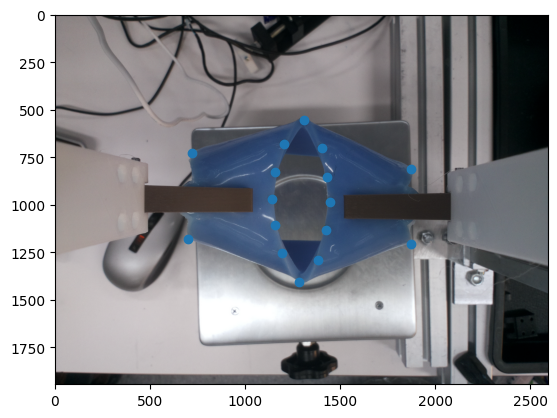

In [10]:
plt.imshow(img_arr)
x_points = image_data.iloc[0][1:][::2]
y_points = image_data.iloc[0][2:][::2]
x_width = img_arr.shape[1]
y_height = img_arr.shape[0]

plt.scatter(x_points*x_width, y_points*y_height)

In [29]:
class ImageDataset(Dataset):
    def __init__(self, df, img_dir):
        self.df = df
        self.img_dir = img_dir
        
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.df.iloc[idx, 0])
        image = cv2.imread(img_path)
        label = self.df.iloc[idx, 1:]
        image = self.transform_image(image)
        return image.to(device), torch.tensor(label).to(device)
    
    def __len__(self):
        return self.df.shape[0]
    
    def transform_image(self, img):
        img = cv2.resize(img, (224,224))
        img_tensor = transforms.ToTensor()(img)
        img_mean = img_tensor.mean(dim = (1,2))
        img_std = img_tensor.std(dim = (1,2))
        
        img_normalised = transforms.Normalize(img_mean, img_std)(img_tensor)
        return img_normalised
    
    def load_img(self, idx):
        img_path = os.path.join(self.img_dir, self.df.iloc[idx, 0])
        img = cv2.imread(img_path)
        return img
    

In [30]:
current_dir = os. getcwd()
images_dir = os.path.join(current_dir, 'Kirigami_dataset_1')
print(images_dir)

/home/dell/Desktop/xxxx/Uni/Kirigami_project/Keypoint_detection_notebooks/Kirigami_dataset_1


In [31]:
train_df, test_df = train_test_split(image_data, test_size=0.04)

In [32]:
print(train_df.shape)
print(test_df.shape)

(96, 33)
(4, 33)


In [33]:
train_dataset = ImageDataset(train_df, images_dir)
test_dataset = ImageDataset(test_df, images_dir)

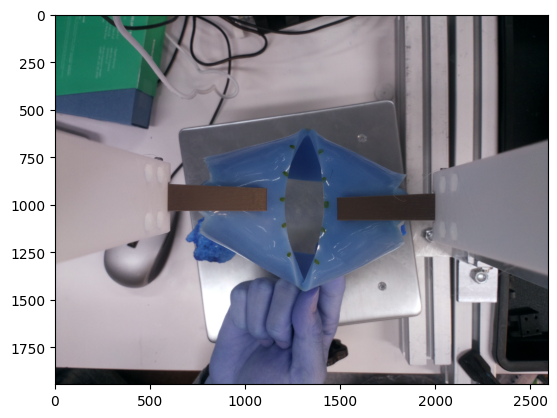

In [34]:
img = test_dataset.load_img(0)
plt.imshow(img)

In [35]:
img_tensor, labels = train_dataset[0]

cuda


In [18]:
labels

tensor([0.2929, 0.4269, 0.4907, 0.3021, 0.6661, 0.4700, 0.6614, 0.6363, 0.4776,
        0.6979, 0.2866, 0.6193, 0.4668, 0.3802, 0.4568, 0.4572, 0.4528, 0.5274,
        0.4564, 0.5964, 0.4584, 0.6650, 0.4999, 0.6777, 0.5043, 0.6039, 0.5106,
        0.5359, 0.5087, 0.4705, 0.5055, 0.3887], device='cuda:0',
       dtype=torch.float64)

In [19]:
img_tensor

tensor([[[-1.4072, -1.5764, -1.3456,  ..., -1.7919, -1.7919, -1.7765],
         [-1.4379, -1.5457, -1.3302,  ..., -1.7765, -1.7919, -1.7919],
         [-1.5149, -1.4841, -1.3302,  ..., -1.7919, -1.7303, -1.7919],
         ...,
         [ 1.0704,  1.0242,  1.0550,  ..., -1.7919, -1.7919, -1.7919],
         [ 0.9781,  0.9781,  1.0704,  ..., -1.6995, -1.7149, -1.7611],
         [ 0.9627,  0.9934,  1.0396,  ..., -1.1917, -1.0378, -1.0378]],

        [[-0.1520, -0.2049,  0.0243,  ..., -2.1088, -2.1088, -2.0559],
         [-0.1167, -0.1696, -0.0109,  ..., -2.0735, -2.0911, -2.0911],
         [-0.1343, -0.1167, -0.0991,  ..., -2.1088, -2.0030, -2.1088],
         ...,
         [ 0.9410,  0.9410,  0.9586,  ..., -2.0559, -2.0735, -2.0382],
         [ 0.9057,  0.8352,  0.9410,  ..., -1.9148, -1.9501, -2.0030],
         [ 0.8352,  0.8881,  0.8705,  ..., -1.3331, -1.2273, -1.1568]],

        [[-0.8452, -0.9169, -0.6660,  ..., -2.2253, -2.2253, -2.1716],
         [-0.8273, -0.8810, -0.6839,  ..., -2

In [20]:
img_np = img_tensor.cpu().numpy()
img_np

array([[[-1.4071655 , -1.5764393 , -1.3456115 , ..., -1.7918785 ,
         -1.7918785 , -1.77649   ],
        [-1.4379426 , -1.5456622 , -1.330223  , ..., -1.77649   ,
         -1.7918785 , -1.7918785 ],
        [-1.5148852 , -1.4841081 , -1.330223  , ..., -1.7918785 ,
         -1.7303244 , -1.7918785 ],
        ...,
        [ 1.0703857 ,  1.0242202 ,  1.0549972 , ..., -1.7918785 ,
         -1.7918785 , -1.7918785 ],
        [ 0.97805464,  0.97805464,  1.0703857 , ..., -1.6995474 ,
         -1.7149359 , -1.7611015 ],
        [ 0.96266615,  0.9934432 ,  1.0396087 , ..., -1.1917262 ,
         -1.0378411 , -1.0378411 ]],

       [[-0.15197513, -0.20486103,  0.02431121, ..., -2.1087537 ,
         -2.1087537 , -2.0558677 ],
        [-0.11671785, -0.16960375, -0.01094605, ..., -2.0734963 ,
         -2.091125  , -2.091125  ],
        [-0.13434649, -0.11671785, -0.09908922, ..., -2.1087537 ,
         -2.0029817 , -2.1087537 ],
        ...,
        [ 0.9410003 ,  0.9410003 ,  0.95862895, ..., -

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 224, 224)
(224, 224, 3)


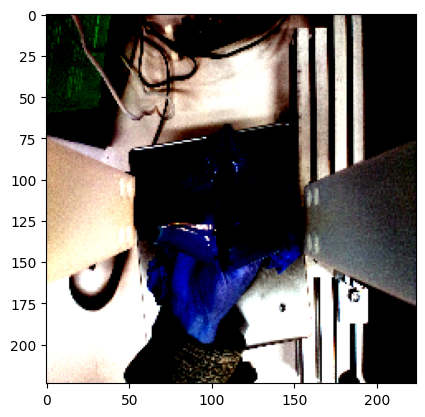

In [21]:
print(img_np.shape)
img_np_reverted = np.transpose(img_np, (1,2,0))
print(img_np_reverted.shape)
plt.imshow(img_np_reverted, clim=(-1, 1))

In [22]:
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=2, shuffle=True)

In [23]:
for img, points in train_dataloader:
  print(img.shape)
  print(points.shape)
  break

torch.Size([8, 3, 224, 224])
torch.Size([8, 32])


In [24]:
class VGG_model(nn.Module):
    def __init__(self):
        super(VGG_model, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.LeakyReLU(0.1,inplace=True),
            nn.Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.LeakyReLU(0.1,inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
            nn.Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.LeakyReLU(0.1,inplace=True),
            nn.Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.LeakyReLU(0.1,inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
            nn.Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.LeakyReLU(0.1,inplace=True),
            nn.Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.LeakyReLU(0.1,inplace=True),
            nn.Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.LeakyReLU(0.1,inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
            nn.Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.LeakyReLU(0.1,inplace=True),
            nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.LeakyReLU(0.1,inplace=True),
            nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.LeakyReLU(0.1,inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
            nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.LeakyReLU(0.1,inplace=True),
            nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.LeakyReLU(0.1,inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        )
        
        self.avgpool = nn.Sequential(
            nn.Conv2d(512,512, kernel_size=3, padding='same'),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(512,50, kernel_size=3, padding='same'),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.AdaptiveAvgPool2d(output_size=(8,8))
        )
        
        self.classifier = nn.Sequential(
            nn.Linear(3200, 300),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(300, 6),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x
        

In [25]:
# model = models.vgg16(pretrained=False)
model = VGG_model()

In [26]:
# # making the weights non trainable

# for param in model.parameters():
#   param.requires_grad = False

In [27]:
from torch.nn.modules.activation import Sigmoid
from torch.nn.modules.pooling import AdaptiveAvgPool2d
pool_layer = nn.Sequential(
     nn.Conv2d(512,512, kernel_size=3, padding='same'),
     nn.LeakyReLU(0.1,inplace=True),
     nn.MaxPool2d(kernel_size=2, stride=2),
     nn.Conv2d(512,50, kernel_size=3, padding='same'),
     nn.LeakyReLU(0.1,inplace=True),
     nn.MaxPool2d(kernel_size=2, stride=2),
     nn.AdaptiveAvgPool2d(output_size=(8,8))
)

model.avgpool = pool_layer

final_predictor = nn.Sequential(
    nn.Linear(3200, 300),
    nn.LeakyReLU(0.1,inplace=True),
    nn.Dropout(0.3),
    nn.Linear(300, 32),
    nn.Sigmoid()
)

model.classifier = final_predictor

In [28]:
summary(model, torch.rand(1,3,224,224))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 512, 7, 7]           --
|    └─Conv2d: 2-1                       [-1, 64, 224, 224]        1,792
|    └─LeakyReLU: 2-2                    [-1, 64, 224, 224]        --
|    └─Conv2d: 2-3                       [-1, 64, 224, 224]        36,928
|    └─LeakyReLU: 2-4                    [-1, 64, 224, 224]        --
|    └─MaxPool2d: 2-5                    [-1, 64, 112, 112]        --
|    └─Conv2d: 2-6                       [-1, 128, 112, 112]       73,856
|    └─LeakyReLU: 2-7                    [-1, 128, 112, 112]       --
|    └─Conv2d: 2-8                       [-1, 128, 112, 112]       147,584
|    └─LeakyReLU: 2-9                    [-1, 128, 112, 112]       --
|    └─MaxPool2d: 2-10                   [-1, 128, 56, 56]         --
|    └─Conv2d: 2-11                      [-1, 256, 56, 56]         295,168
|    └─LeakyReLU: 2-12                   [-1, 256, 56, 56]      

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 512, 7, 7]           --
|    └─Conv2d: 2-1                       [-1, 64, 224, 224]        1,792
|    └─LeakyReLU: 2-2                    [-1, 64, 224, 224]        --
|    └─Conv2d: 2-3                       [-1, 64, 224, 224]        36,928
|    └─LeakyReLU: 2-4                    [-1, 64, 224, 224]        --
|    └─MaxPool2d: 2-5                    [-1, 64, 112, 112]        --
|    └─Conv2d: 2-6                       [-1, 128, 112, 112]       73,856
|    └─LeakyReLU: 2-7                    [-1, 128, 112, 112]       --
|    └─Conv2d: 2-8                       [-1, 128, 112, 112]       147,584
|    └─LeakyReLU: 2-9                    [-1, 128, 112, 112]       --
|    └─MaxPool2d: 2-10                   [-1, 128, 56, 56]         --
|    └─Conv2d: 2-11                      [-1, 256, 56, 56]         295,168
|    └─LeakyReLU: 2-12                   [-1, 256, 56, 56]      

In [68]:
# getting the optimizer and loss_function 

def get_essentials():
  loss_fun = nn.L1Loss()
  optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
  return loss_fun, optimizer

In [69]:
# defining batch_train and accuracy functions


def train_batch(data, model, loss_fun, optimizer):
  model.train()
  img, true_points = data
  pred_points = model(img)
  loss_val = loss_fun(pred_points, true_points)
  loss_val.backward()
  optimizer.step()
  optimizer.zero_grad()
  return loss_val.item()

@torch.no_grad()
def val_batch(data, model, loss_fun, optimizer):
  model.eval()
  img, true_points = data
  pred_points = model(img)
  loss_val = loss_fun(pred_points, true_points)
  return loss_val.item()


In [70]:
epochs = 30
loss_fun, optimizer = get_essentials()

In [71]:
# training and validation loops 


train_epoch, val_epoch = [], []
for epoch in tqdm(range(epochs)):
  train_batch_losses, val_batch_losses = [], []
  for data in train_dataloader:
    train_batch_loss = train_batch(data, model, loss_fun, optimizer)
    train_batch_losses.append(train_batch_loss)
  for data in test_dataloader:
    val_batch_loss = val_batch(data, model, loss_fun, optimizer)
    val_batch_losses.append(val_batch_loss)
  train_epoch.append(np.mean(train_batch_losses))
  val_epoch.append(np.mean(val_batch_losses))
  
  print(train_batch_loss, val_batch_loss)

  3%|█▏                                | 1/30 [00:07<03:38,  7.55s/it]

0.11310164800137687 0.11966043346351665


  7%|██▎                               | 2/30 [00:15<03:31,  7.55s/it]

0.10315646412072235 0.12962306440848034


 10%|███▍                              | 3/30 [00:22<03:25,  7.62s/it]

0.10103560236695588 0.0887393078370194


 13%|████▌                             | 4/30 [00:30<03:21,  7.73s/it]

0.07882885618865393 0.12421811395822002


 17%|█████▋                            | 5/30 [00:38<03:13,  7.75s/it]

0.10486133392569309 0.09168860986455907


 20%|██████▊                           | 6/30 [00:46<03:07,  7.81s/it]

0.07549137985294374 0.12641519201662593


 23%|███████▉                          | 7/30 [00:54<03:00,  7.85s/it]

0.08180252677118764 0.11860291365646819


 27%|█████████                         | 8/30 [01:02<02:53,  7.90s/it]

0.05674684851736122 0.09181837609997384


 30%|██████████▏                       | 9/30 [01:10<02:46,  7.92s/it]

0.11128475067361251 0.11618944815295518


 33%|███████████                      | 10/30 [01:18<02:39,  7.99s/it]

0.047986042719673785 0.12575832108548296


 37%|████████████                     | 11/30 [01:26<02:32,  8.05s/it]

0.12217729221204919 0.12381906980391794


 40%|█████████████▏                   | 12/30 [01:35<02:26,  8.16s/it]

0.08212574397046049 0.11759367290997008


 43%|██████████████▎                  | 13/30 [01:43<02:19,  8.18s/it]

0.05882356432272813 0.11611789580370069


 47%|███████████████▍                 | 14/30 [01:51<02:10,  8.17s/it]

0.05978652169794023 0.08770450996415943


 50%|████████████████▌                | 15/30 [01:59<02:03,  8.23s/it]

0.08660399626236351 0.08549468217775058


 53%|█████████████████▌               | 16/30 [02:08<01:55,  8.24s/it]

0.0703107791896701 0.12652924960045053


 57%|██████████████████▋              | 17/30 [02:16<01:46,  8.21s/it]

0.1191209030998033 0.12763800076706244


 60%|███████████████████▊             | 18/30 [02:24<01:38,  8.20s/it]

0.11087141487644128 0.08967695534899958


 63%|████████████████████▉            | 19/30 [02:32<01:31,  8.32s/it]

0.06788368157192094 0.12512130556371265


 67%|██████████████████████           | 20/30 [02:41<01:23,  8.39s/it]

0.06198723174943849 0.09462923413758441


 70%|███████████████████████          | 21/30 [02:49<01:15,  8.40s/it]

0.07487051989092575 0.08852052542857103


 73%|████████████████████████▏        | 22/30 [02:58<01:06,  8.34s/it]

0.07907036526807278 0.09239922666309547


 77%|█████████████████████████▎       | 23/30 [03:06<00:59,  8.45s/it]

0.07200481632241382 0.1250629758046372


 80%|██████████████████████████▍      | 24/30 [03:15<00:50,  8.46s/it]

0.06846919544048999 0.11794247221137166


 83%|███████████████████████████▌     | 25/30 [03:23<00:42,  8.40s/it]

0.06043381667644442 0.11656879795650721


 87%|████████████████████████████▌    | 26/30 [03:31<00:33,  8.38s/it]

0.08840913869113298 0.11980709995126569


 90%|█████████████████████████████▋   | 27/30 [03:40<00:25,  8.57s/it]

0.07748860111009376 0.0887697248843799


 93%|██████████████████████████████▊  | 28/30 [03:49<00:17,  8.64s/it]

0.08423444507034482 0.12023749950325334


 97%|███████████████████████████████▉ | 29/30 [03:58<00:08,  8.54s/it]

0.06763375863769343 0.11954603323696399


100%|█████████████████████████████████| 30/30 [04:06<00:00,  8.21s/it]

0.04598221781338975 0.12583728856904342


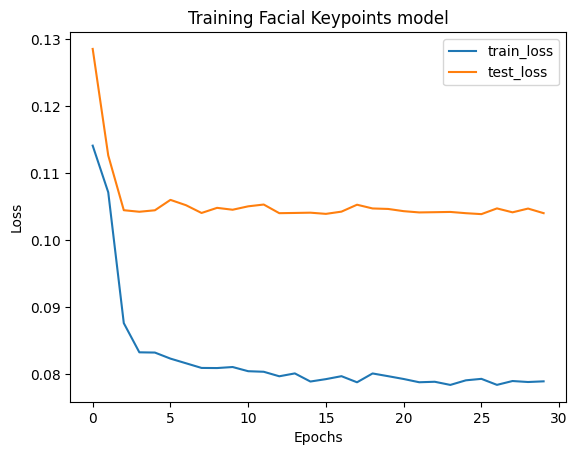

In [72]:
plt.plot(range(epochs), train_epoch, label="train_loss")
plt.plot(range(epochs), val_epoch, label="test_loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Facial Keypoints model")
plt.show()

# Displaying the results

In [ ]:
index = 0
test_img, points = test_dataset[index]
Facial_key_points = model(test_img[None]).flatten().detach().cpu()
plt.subplot(121)
plt.title("Image")
img = test_dataset.load_img(index)
img = img[:,:,::-1]                                                              
plt.imshow(img)
plt.subplot(122)
plt.title(" Image with Keypoints ")
plt.imshow(img)
x_points = Facial_key_points.numpy()[0::2]
y_points = Facial_key_points.numpy()[1::2]
plt.scatter(x_points*img.shape[1], y_points*img.shape[0], s = 2)                          # scaling the keypoints with image dimension
plt.show()

In [ ]:
print(Facial_key_points)

In [ ]:
x_points = Facial_key_points.numpy()[0::2]
y_points = Facial_key_points.numpy()[1::2]
print(x_points)
print(y_points)

# width = img_arr.shape[0]
# height = img_arr.shape[1]

# plt.scatter(x_points*x_width, y_points*y_height)

In [ ]:
for i in range(10):
    
    folder = 'asdsadsd'
    print(folder + str(i).zfill(2)+'.jpg')